In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_representative_regions(ver240113).csv')

In [3]:
data['lossco_no'] = data['lossco']/data['no']
data = data[data['region']!="SGP"]
data = data[data['region']!="VAN"]

In [4]:
lco_no_region_mean = data.groupby(['region']).mean()['lossco_no']
lco_no_region_std = data.groupby(['region']).std()['lossco_no']
lco_no_region_ct = data.groupby(['region']).count()['lossco_no']
lco_no_region_ste = lco_no_region_std/np.sqrt(lco_no_region_ct/5)

ho2_region_mean = data.groupby(['region']).mean()['ho2_mole']
ho2_region_std = data.groupby(['region']).std()['ho2_mole']
ho2_region_ct = data.groupby(['region']).count()['ho2_mole']
ho2_region_ste = ho2_region_std/np.sqrt(ho2_region_ct/5)

In [6]:
lco = pd.DataFrame()
lco['lco_no_mean'] = lco_no_region_mean
lco['lco_no_ste'] = lco_no_region_ste
lco['ho2_mean'] = ho2_region_mean
lco['ho2_ste'] = ho2_region_ste
lco

,lco_no_mean,lco_no_ste,ho2_mean,ho2_ste
region,,,,
AUS,0.002275,0.000325,1.385317e+07,2.081810e+06
BRA,0.002681,0.000224,2.054727e+07,1.529214e+06
BTH,0.000061,0.000012,2.995108e+05,6.339234e+04
CA,0.000689,0.000143,4.291214e+06,8.999748e+05
CCE,0.000769,0.000089,3.736210e+06,4.676721e+05
COD,0.003247,0.000173,2.118083e+07,8.855164e+05
DEU,0.000595,0.000094,3.376573e+06,5.807457e+05
FIN,0.001494,0.000250,7.435275e+06,1.341100e+06
FRA,0.001614,0.000103,9.107582e+06,6.195603e+05


In [17]:
mod = LinearRegression()
X = lco[['lco_no_mean']]*10**3
y = lco['ho2_mean']*10**(-7)
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[0.64429368]
-0.08559188693702025
0.9893201586574333
0.12050630584440011


<ErrorbarContainer object of 3 artists>

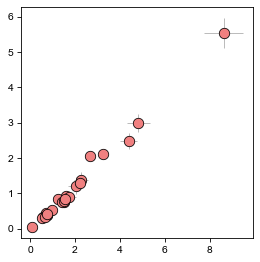

In [10]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
x_values = lco['lco_no_mean']*10**3
y_values = lco['ho2_mean']*10**(-7)
x_errors = lco['lco_no_ste']*10**3
y_errors = lco['ho2_ste']*10**(-7)


#plt.scatter(x_values, y_values, c='red', s=50, marker='o', linewidths=0.75, edgecolors='black')
plt.errorbar(x_values, y_values, xerr=x_errors, yerr=y_errors, 
             fmt="o", ecolor="grey", elinewidth=0.5, capsize=None, mfc='lightcoral', mec='black', alpha=1, ms=10, mew=0.75)

#plt.yticks([0, 5, 10, 15], fontsize=12)
#plt.xticks([0, 1, 2, 3, 4, 5], fontsize=12)

<ErrorbarContainer object of 3 artists>

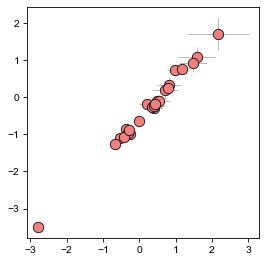

In [12]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
lg_x_values = np.log(x_values)
lg_y_values = np.log(y_values)
lg_x_errors = np.log(x_errors)
lg_y_errors = np.log(y_errors)


#plt.scatter(x_values, y_values, c='red', s=50, marker='o', linewidths=0.75, edgecolors='black')
plt.errorbar(lg_x_values, lg_y_values, xerr=x_errors, yerr=y_errors, 
             fmt="o", ecolor="grey", elinewidth=0.5, capsize=None, mfc='lightcoral', mec='black', alpha=1, ms=10, mew=0.75)

#plt.yticks([0, 5, 10, 15], fontsize=12)
#plt.xticks([0, 1, 2, 3, 4, 5], fontsize=12)

In [13]:
mod = LinearRegression()
X = lco[['lco_no_mean']]*10**3
y = lco['ho2_mean']*10**(-7)
mod.fit(np.log(X),np.log(y))
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(np.log(X))
print(r2_score(y_pred, np.log(y)))
print(np.sqrt(MSE(y_pred, np.log(y))))

[1.06058806]
-0.5815459844214419
0.9916381876975815
0.09238699003628265


In [14]:
data_sens = pd.read_csv('Fig. 3b SnSv sensitivities scatter plot.csv')

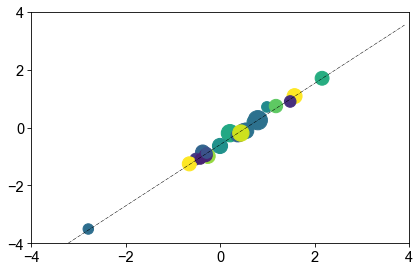

In [16]:
fig, ax = plt.subplots(figsize=(6.5, 4), dpi=75)
X = lco[['lco_no_mean']]*10**3
y = lco['ho2_mean']*10**(-7)
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

x_set = np.arange(-4,4,0.1)
y_set = x_set*mod.coef_+mod.intercept_
plt.plot(x_set, y_set, linestyle='-.', linewidth=0.5, color="black")

plt.scatter(np.log(X),np.log(y), s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")

#plt.colorbar()
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.yticks([-4,-2,0,2,4], fontsize=14)
plt.xticks([-4,-2,0,2,4], fontsize=14)

plt.savefig("Fig. 3d L(CO)_NO-HO2.pdf", format="pdf", bbox_inches="tight")